<a href="https://colab.research.google.com/github/gaurinotgauri/band_gap_prediction_polymer/blob/main/band_gap_prediction_amalgam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor



In [37]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_sub = pd.read_csv('/content/sample_submission.csv')


In [38]:
df_train.head()

,id,polymer,fp_mqns_1,fp_mqns_2,fp_mqns_3,fp_mqns_4,fp_mqns_5,fp_mqns_6,fp_mqns_7,fp_mqns_8,...,fp_o_desc_chi1n,fp_o_desc_chi1v,fp_o_desc_chi2n,fp_o_desc_chi2v,fp_o_desc_chi3n,fp_o_desc_chi3v,fp_o_desc_chi4n,fp_o_desc_chi4v,fp_o_desc_HallKierAlpha,band_gap
0,789,[*]C(=O)c1ccc2c(c1)C(=O)N(c1ccc(C3(c4ccc(N5C(=...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.377963,0.377963,0.300679,0.300679,0.245471,0.245471,0.192698,0.192698,0.160238,2.3311
1,2983,[*]CCCCCOC(=O)c1ccc(C(=O)NCCCCCCNC(=O)c2ccc(C(...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.074074,...,0.449784,0.449784,0.310747,0.310747,0.209719,0.209719,0.132236,0.132236,0.136296,4.3426
2,1037,[*]CNON[*],1,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,...,1.093414,1.093414,0.536822,0.536822,0.266744,0.266744,0.136920,0.136920,0.120000,5.3302
3,1068,[*]Oc1ccc(-c2ccc(OC(=O)CCCCCCCCC([*])=O)cc2)cc1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.423286,0.423286,0.299429,0.299429,0.203747,0.203747,0.136631,0.136631,0.119091,4.5699
4,3322,[*]OC1(O)CCCC([*])C1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.530491,0.530491,0.458749,0.458749,0.329913,0.329913,0.269098,0.269098,0.013333,6.0531


In [39]:
df_train.size, df_train.shape

(220458, (2534, 87))

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2534 non-null   int64  
 1   polymer                  2534 non-null   object 
 2   fp_mqns_1                2534 non-null   int64  
 3   fp_mqns_2                2534 non-null   float64
 4   fp_mqns_3                2534 non-null   float64
 5   fp_mqns_4                2534 non-null   float64
 6   fp_mqns_5                2534 non-null   float64
 7   fp_mqns_6                2534 non-null   float64
 8   fp_mqns_7                2534 non-null   float64
 9   fp_mqns_8                2534 non-null   float64
 10  fp_mqns_9                2534 non-null   float64
 11  fp_mqns_10               2534 non-null   float64
 12  fp_mqns_11               2534 non-null   float64
 13  fp_mqns_12               2534 non-null   float64
 14  fp_mqns_13              

In [41]:
df_train.describe()

,id,fp_mqns_1,fp_mqns_2,fp_mqns_3,fp_mqns_4,fp_mqns_5,fp_mqns_6,fp_mqns_7,fp_mqns_8,fp_mqns_9,...,fp_o_desc_chi1n,fp_o_desc_chi1v,fp_o_desc_chi2n,fp_o_desc_chi2v,fp_o_desc_chi3n,fp_o_desc_chi3v,fp_o_desc_chi4n,fp_o_desc_chi4v,fp_o_desc_HallKierAlpha,band_gap
count,2534.000000,2534.0,2534.000000,2534.00000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,...,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,1710.470797,1.0,0.055032,0.01115,0.002470,0.000609,0.033564,0.000693,0.061983,0.027791,...,0.464155,0.499494,0.341241,0.386593,0.230217,0.270344,0.155033,0.188956,0.121631,4.551584
std,968.637489,0.0,0.252474,0.07151,0.029294,0.020997,0.094183,0.006922,0.128136,0.071108,...,0.081286,0.126236,0.061661,0.136319,0.043694,0.107586,0.041547,0.097994,0.063712,1.556705
min,1.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.284699,0.244418,0.141931,0.141931,0.063623,0.063623,0.028461,0.028461,0.000000,0.069000
25%,884.250000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.403169,0.418513,0.299175,0.313162,0.203337,0.214198,0.130345,0.139189,0.077143,3.285825
50%,1723.500000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.453044,0.484089,0.328039,0.351935,0.223038,0.238886,0.147543,0.161584,0.122667,4.636900
75%,2548.750000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.511847,0.531963,0.363460,0.416613,0.245470,0.296156,0.169577,0.206964,0.161870,5.835100
max,3377.000000,1.0,2.333333,1.50000,1.000000,1.000000,1.000000,0.125000,2.000000,1.000000,...,1.329670,1.950662,0.678719,2.529143,0.590197,2.156654,0.612820,1.695477,0.770000,9.862700


In [42]:
feature_names = df_train.columns.tolist()
print(feature_names)

['id', 'polymer', 'fp_mqns_1', 'fp_mqns_2', 'fp_mqns_3', 'fp_mqns_4', 'fp_mqns_5', 'fp_mqns_6', 'fp_mqns_7', 'fp_mqns_8', 'fp_mqns_9', 'fp_mqns_10', 'fp_mqns_11', 'fp_mqns_12', 'fp_mqns_13', 'fp_mqns_14', 'fp_mqns_15', 'fp_mqns_16', 'fp_mqns_17', 'fp_mqns_18', 'fp_mqns_19', 'fp_mqns_20', 'fp_mqns_21', 'fp_mqns_22', 'fp_mqns_23', 'fp_mqns_24', 'fp_mqns_25', 'fp_mqns_26', 'fp_mqns_27', 'fp_mqns_28', 'fp_mqns_29', 'fp_mqns_30', 'fp_mqns_31', 'fp_mqns_32', 'fp_mqns_33', 'fp_mqns_34', 'fp_mqns_35', 'fp_mqns_36', 'fp_mqns_37', 'fp_mqns_38', 'fp_mqns_39', 'fp_mqns_40', 'fp_mqns_41', 'fp_mqns_42', 'fp_smrVsa_1', 'fp_smrVsa_2', 'fp_smrVsa_3', 'fp_smrVsa_4', 'fp_smrVsa_5', 'fp_smrVsa_6', 'fp_smrVsa_7', 'fp_smrVsa_8', 'fp_smrVsa_9', 'fp_smrVsa_10', 'fp_slogPVsa_1', 'fp_slogPVsa_2', 'fp_slogPVsa_3', 'fp_slogPVsa_4', 'fp_slogPVsa_5', 'fp_slogPVsa_6', 'fp_slogPVsa_7', 'fp_slogPVsa_8', 'fp_slogPVsa_9', 'fp_slogPVsa_10', 'fp_slogPVsa_11', 'fp_slogPVsa_12', 'fp_o_desc_nRotBon', 'fp_o_desc_nRing', 'fp_o

In [43]:
df=df_train.copy()

In [44]:
#Creating new features
df['heteroatom'] = df['polymer'].str.contains('N|O|S').astype(int)
df['length'] = df['polymer'].apply(lambda x: len(x) * 0.01)

df_test['heteroatom'] = df_test['polymer'].str.contains('N|O|S').astype(int)
df_test['length'] = df_test['polymer'].apply(lambda x: len(x) * 0.01)


In [45]:
#Dropping object type feature as we already have id as an identity for unique polymers
df.drop(columns = ['polymer'], axis=1,  inplace = True)
df_test.drop(columns = ['polymer'], axis=1,  inplace = True)


In [46]:
# Check for 'inf' values
inf_columns = df.columns.to_series()[np.isinf(df).any()]

# Check for 'NaN' values
nan_columns = df.columns[df.isna().any()].tolist()

print('Columns with inf values:\n', inf_columns)
print('Columns with NaN values:\n', nan_columns)

Columns with inf values:
 Series([], dtype: object)
Columns with NaN values:
 []


In [47]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

correlations = df.corr()['band_gap']
print(correlations)


id                         0.004273
fp_mqns_1                       NaN
fp_mqns_2                  0.245355
fp_mqns_3                  0.086540
fp_mqns_4                 -0.007486
fp_mqns_5                 -0.010320
fp_mqns_6                 -0.245355
fp_mqns_7                  0.002915
fp_mqns_8                  0.080154
fp_mqns_9                 -0.217196
fp_mqns_10                 0.372499
fp_mqns_11                 0.046889
fp_mqns_12                 0.298282
fp_mqns_13                 0.631249
fp_mqns_14                 0.061315
fp_mqns_15                 0.018253
fp_mqns_16                -0.499120
fp_mqns_17                -0.733422
fp_mqns_18                      NaN
fp_mqns_19                 0.613447
fp_mqns_20                 0.329418
fp_mqns_21                 0.270678
fp_mqns_22                 0.108600
fp_mqns_23                 0.111551
fp_mqns_24                -0.014917
fp_mqns_25                -0.090499
fp_mqns_26                 0.353085
fp_mqns_27                 0

In [48]:
# Filter correlations DataFrame for values greater than 0.05 or less than -0.05 in absolute terms
high_correlations = correlations[(correlations.abs() > 0.04) | (correlations.abs() < -0.04)]

print(high_correlations)


fp_mqns_2                  0.245355
fp_mqns_3                  0.086540
fp_mqns_6                 -0.245355
fp_mqns_8                  0.080154
fp_mqns_9                 -0.217196
fp_mqns_10                 0.372499
fp_mqns_11                 0.046889
fp_mqns_12                 0.298282
fp_mqns_13                 0.631249
fp_mqns_14                 0.061315
fp_mqns_16                -0.499120
fp_mqns_17                -0.733422
fp_mqns_19                 0.613447
fp_mqns_20                 0.329418
fp_mqns_21                 0.270678
fp_mqns_22                 0.108600
fp_mqns_23                 0.111551
fp_mqns_25                -0.090499
fp_mqns_26                 0.353085
fp_mqns_27                 0.547435
fp_mqns_28                 0.323063
fp_mqns_29                 0.276948
fp_mqns_30                -0.604541
fp_mqns_31                -0.645408
fp_mqns_32                 0.100370
fp_mqns_33                 0.068323
fp_mqns_34                 0.053262
fp_mqns_35                -0

In [49]:
# Get the column names of features with high correlation
high_correlation_features = high_correlations.index
# Create a new DataFrame with only the features that meet the condition of high correlation
df1 = df[high_correlation_features]
df1.columns

Index(['fp_mqns_2', 'fp_mqns_3', 'fp_mqns_6', 'fp_mqns_8', 'fp_mqns_9',
       'fp_mqns_10', 'fp_mqns_11', 'fp_mqns_12', 'fp_mqns_13', 'fp_mqns_14',
       'fp_mqns_16', 'fp_mqns_17', 'fp_mqns_19', 'fp_mqns_20', 'fp_mqns_21',
       'fp_mqns_22', 'fp_mqns_23', 'fp_mqns_25', 'fp_mqns_26', 'fp_mqns_27',
       'fp_mqns_28', 'fp_mqns_29', 'fp_mqns_30', 'fp_mqns_31', 'fp_mqns_32',
       'fp_mqns_33', 'fp_mqns_34', 'fp_mqns_35', 'fp_mqns_36', 'fp_mqns_41',
       'fp_mqns_42', 'fp_smrVsa_1', 'fp_smrVsa_2', 'fp_smrVsa_3',
       'fp_smrVsa_4', 'fp_smrVsa_5', 'fp_smrVsa_6', 'fp_smrVsa_7',
       'fp_smrVsa_9', 'fp_smrVsa_10', 'fp_slogPVsa_1', 'fp_slogPVsa_2',
       'fp_slogPVsa_3', 'fp_slogPVsa_4', 'fp_slogPVsa_5', 'fp_slogPVsa_6',
       'fp_slogPVsa_8', 'fp_slogPVsa_10', 'fp_slogPVsa_11', 'fp_slogPVsa_12',
       'fp_o_desc_nRotBon', 'fp_o_desc_nRing', 'fp_o_desc_nAroRing',
       'fp_o_desc_nAliRing', 'fp_o_desc_k1', 'fp_o_desc_k2', 'fp_o_desc_k3',
       'fp_o_desc_chi0', 'fp_o_desc_chi

In [50]:

# Define a function to plot histograms with annotations
def plot_hist(ax, col, df1):
    values, bin_edges = np.histogram(df1[col], bins=10)
    graph = sns.histplot(data=df1, x=col, bins=bin_edges, kde=True, ax=ax,
                         edgecolor='none', color='skyblue', alpha=0.7, line_kws={'lw': 2})

    # Annotate with counts and statistics
    for j, p in enumerate(graph.patches):
        count = int(p.get_height())
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                   ha='center', va='bottom', fontsize=8, fontweight='bold')

    mean = df1[col].mean()
    std = df1[col].std()
    textstr = f'\nμ = {mean:.2f}\nσ = {std:.2f}'
    ax.text(0.75, 0.9, textstr, transform=ax.transAxes, fontsize=8, va='top',
            color='black', bbox=dict(boxstyle='round', facecolor='#ffffff', edgecolor='white', pad=0.3))

    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xticks(np.round(bin_edges, 1))
    # ax.set_xticklabels(ax[x, y].get_xticks(), rotation=45, fontsize=8)
    ax.grid(color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.7)


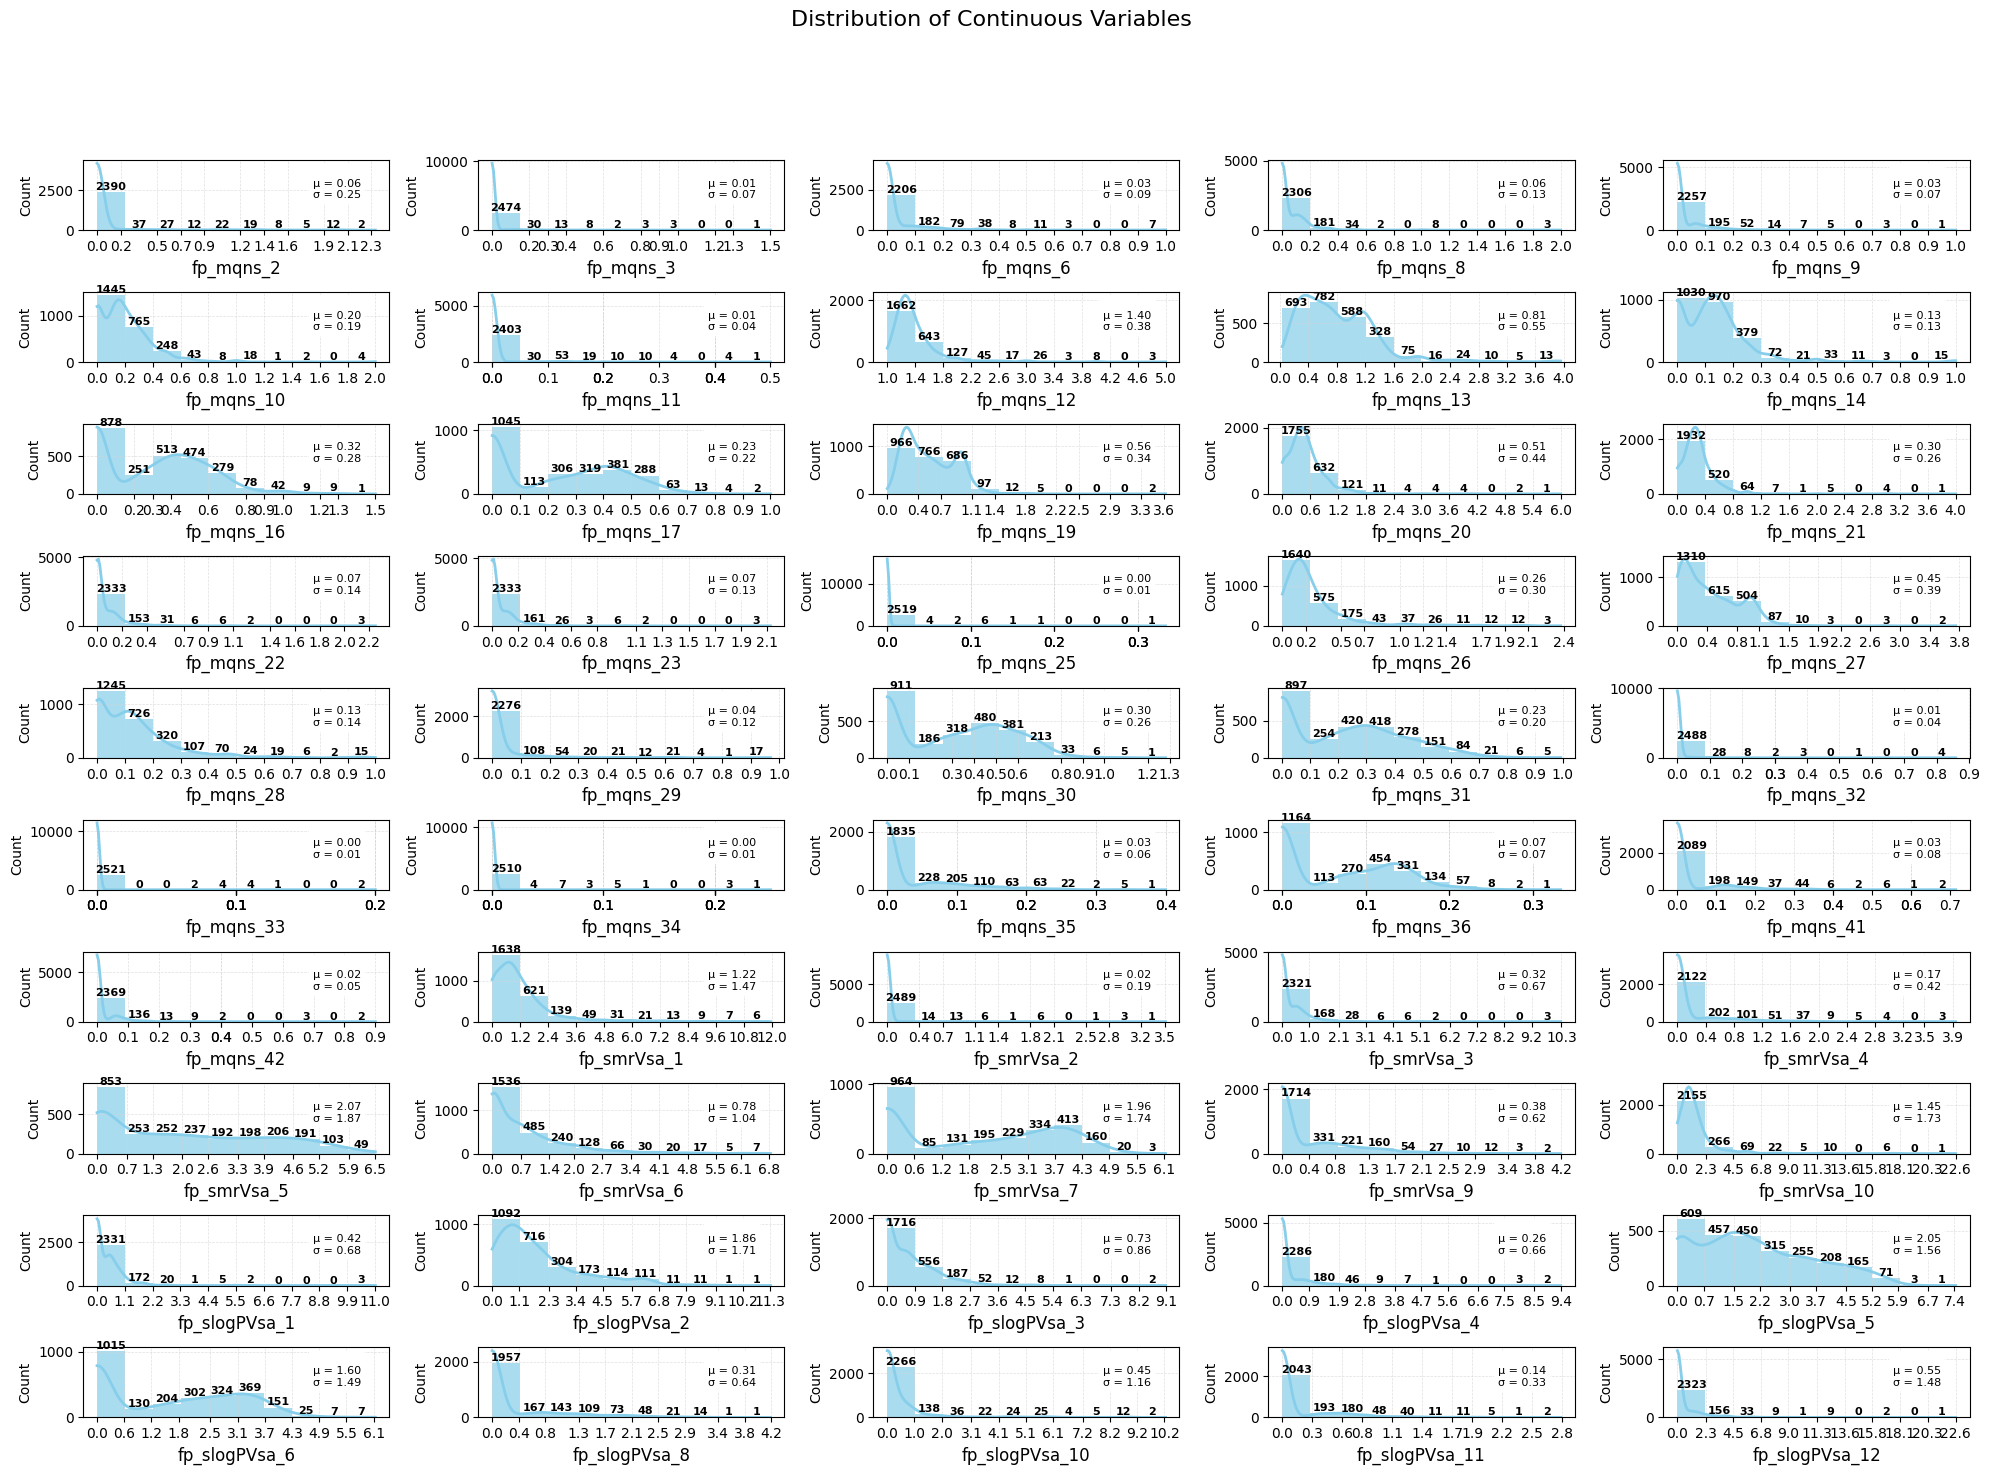

In [51]:
fig, axs = plt.subplots(10, 5, figsize=(20, 15))
warnings.filterwarnings("ignore")

# Iterate through columns and plot histograms
i = 0
for col in df1:
    x = i // 5
    y = i % 5
    plot_hist(axs[x, y], col, df_train)
    i += 1
    if(i >= 50):
        break

plt.suptitle('Distribution of Continuous Variables ', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

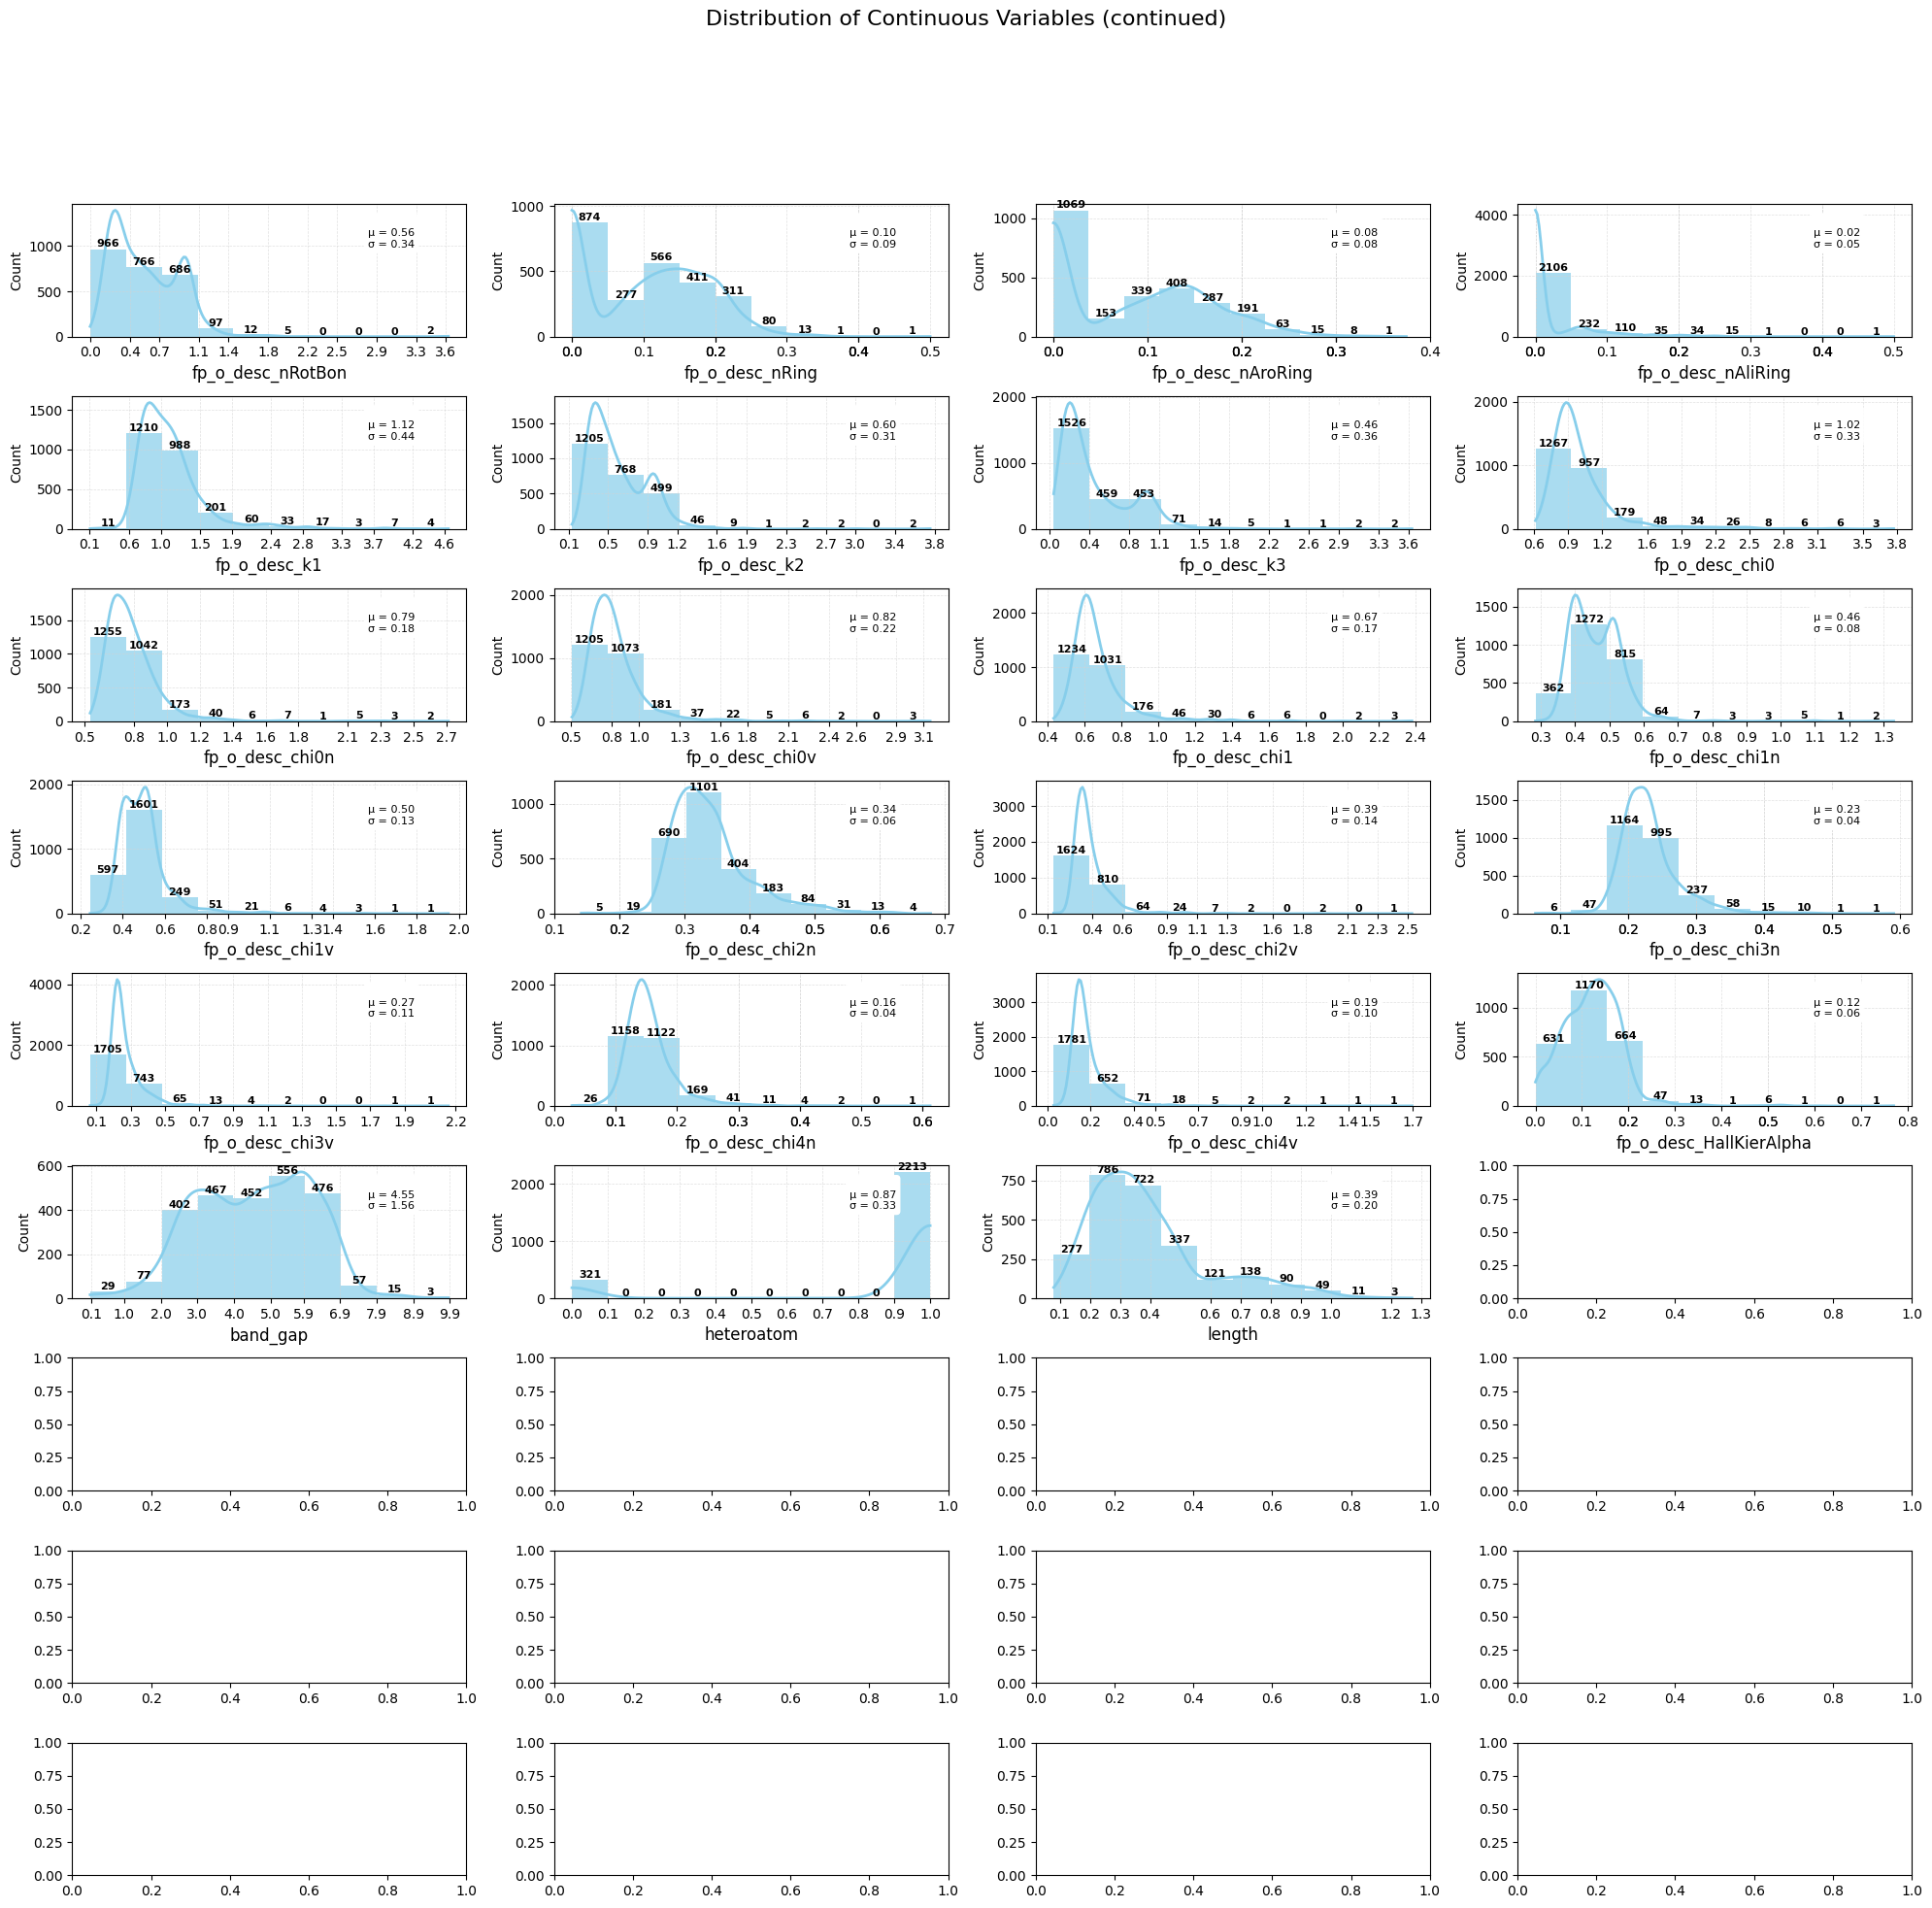

In [52]:
fig, axs = plt.subplots(9, 4, figsize=(20, 20))

# Get the list of column names
columns = df1.columns.tolist()

# Iterate through columns and plot histograms
for i, col in enumerate(columns[50:86]):
    x = i // 4
    y = i % 4
    plot_hist(axs[x, y], col, df1)

# Add overall title and adjust spacing
plt.suptitle('Distribution of Continuous Variables (continued)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


In [53]:
# Get the features from features_to_check that are present in high_correlations
features_to_check = {'fp_mqns_1', 'fp_mqns_5', 'fp_mqns_7', 'fp_mqns_24', 'fp_mqns_25',
                     'fp_mqns_38', 'fp_mqns_18', 'fp_mqns_39', 'fp_mqns_40', 'fp_smrVsa_8', 'fp_slogPVsa_9'}

present_features = high_correlations.index[high_correlations.index.isin(features_to_check)].tolist()

print("Features present in high_correlations:", present_features)


Features present in high_correlations: ['fp_mqns_25']


In [54]:
'''#Deleting redundant columns
delete_columns={'fp_mqns_1','fp_mqns_5','fp_mqns_7', 'fp_mqns_24','fp_mqns_25','fp_mqns_38', 'fp_mqns_18', 'fp_mqns_39', 'fp_mqns_40', 'fp_smrVsa_8', 'fp_slogPVsa_9'}
df1 = df1.drop(columns = delete_columns)
df_test = df_test.drop(columns = delete_columns)'''

"#Deleting redundant columns\ndelete_columns={'fp_mqns_1','fp_mqns_5','fp_mqns_7', 'fp_mqns_24','fp_mqns_25','fp_mqns_38', 'fp_mqns_18', 'fp_mqns_39', 'fp_mqns_40', 'fp_smrVsa_8', 'fp_slogPVsa_9'}\ndf1 = df1.drop(columns = delete_columns)\ndf_test = df_test.drop(columns = delete_columns)"

In [55]:
'''# squaring highly correlated features
features_to_square = [
    'fp_mqns_13',
    'fp_mqns_17',
    'fp_mqns_19',
    'fp_mqns_27',
    'fp_mqns_30',
    'fp_mqns_31',
    'fp_smrVsa_5',
    'fp_smrVsa_7',
    'fp_slogPVsa_6',
    'fp_o_desc_nRotBon',
    'fp_o_desc_nRing',
    'fp_o_desc_nAroRing',
    'fp_o_desc_k2',
    'fp_o_desc_k3',
    'fp_o_desc_chi1n',
    'fp_o_desc_chi2n',

]

for feature in features_to_square:
    df1[f'{feature}sq'] = df1[feature] ** 2
    df_test[f'{feature}sq'] = df_test[feature] ** 2'''

"# squaring highly correlated features\nfeatures_to_square = [\n    'fp_mqns_13',\n    'fp_mqns_17',\n    'fp_mqns_19',\n    'fp_mqns_27',\n    'fp_mqns_30',\n    'fp_mqns_31',\n    'fp_smrVsa_5',\n    'fp_smrVsa_7',\n    'fp_slogPVsa_6',\n    'fp_o_desc_nRotBon',\n    'fp_o_desc_nRing',\n    'fp_o_desc_nAroRing',\n    'fp_o_desc_k2',\n    'fp_o_desc_k3',\n    'fp_o_desc_chi1n',\n    'fp_o_desc_chi2n',\n\n]\n\nfor feature in features_to_square:\n    df1[f'{feature}sq'] = df1[feature] ** 2\n    df_test[f'{feature}sq'] = df_test[feature] ** 2"

In [56]:
'''feature_names = df_train.columns.tolist()
print(feature_names)'''

'feature_names = df_train.columns.tolist()\nprint(feature_names)'

In [57]:
df1['rotatable_bond_ratio']= df1['fp_o_desc_nRotBon'] / (df1['fp_o_desc_nRing'] + df1['fp_o_desc_nAroRing'] + df1['fp_o_desc_nAliRing'])
df_test['rotatable_bond_ratio']= df_test['fp_o_desc_nRotBon'] / (df_test['fp_o_desc_nRing'] + df_test['fp_o_desc_nAroRing'] + df_test['fp_o_desc_nAliRing'])

df1['aromaticity_index'] = df1['fp_o_desc_nAroRing'] / df1['fp_o_desc_nRing']
df_test['aromaticity_index'] = df_test['fp_o_desc_nAroRing'] / df_test['fp_o_desc_nRing']

df1 = df1.replace([np.inf, -np.inf], np.nan).dropna()


In [58]:
# Filter correlations DataFrame for values greater than 0.05 or less than -0.05 in absolute terms
highco = correlations[(correlations.abs() > 0.5)]

print(highco)


fp_mqns_13            0.631249
fp_mqns_17           -0.733422
fp_mqns_19            0.613447
fp_mqns_27            0.547435
fp_mqns_30           -0.604541
fp_mqns_31           -0.645408
fp_smrVsa_5           0.665492
fp_smrVsa_7          -0.708506
fp_slogPVsa_6        -0.683603
fp_o_desc_nRotBon     0.613447
fp_o_desc_nRing      -0.649362
fp_o_desc_nAroRing   -0.723056
fp_o_desc_k2          0.553287
fp_o_desc_k3          0.565402
fp_o_desc_chi1n       0.581577
fp_o_desc_chi2n       0.529911
band_gap              1.000000
Name: band_gap, dtype: float64


In [59]:
tobesq={'fp_mqns_13', 'fp_mqns_17', 'fp_mqns_19', 'fp_mqns_27', 'fp_mqns_30', 'fp_mqns_31',  'fp_smrVsa_5', 'fp_smrVsa_7', 'fp_slogPVsa_6', 'fp_o_desc_nRotBon', 'fp_o_desc_nRing',  'fp_o_desc_nAroRing', 'fp_o_desc_k2', 'fp_o_desc_k3', 'fp_o_desc_chi1n', 'fp_o_desc_chi2n'}

In [61]:
# Select the features and the target variable from the DataFrame
selected_features = df1[['rotatable_bond_ratio', 'aromaticity_index', 'band_gap']]

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Extract the correlation between the features and the target variable
correlation_feature1_target = correlation_matrix.loc['rotatable_bond_ratio', 'band_gap']
correlation_feature2_target = correlation_matrix.loc['aromaticity_index', 'band_gap']

print(f"Correlation between 'rotatable_bond_ratio' and 'band_gap': {correlation_feature1_target}")
print(f"Correlation between 'aromaticity_index' and 'band_gap': {correlation_feature2_target}")


Correlation between 'rotatable_bond_ratio' and 'band_gap': 0.336275690570636
Correlation between 'aromaticity_index' and 'band_gap': -0.47606020524861115


In [62]:
# Get the set of features in df1 and df_test
features_df1 = set(df1.columns)
features_df_test = set(df_test.columns)

# Get the features that are in df_test but not in df1
features_only_in_test = features_df_test - features_df1

# Convert the set to a list
features_only_in_test_list = list(features_only_in_test)

# Print the list of features
print("Features only in df_test:", features_only_in_test_list)


Features only in df_test: ['fp_mqns_40', 'fp_mqns_18', 'fp_smrVsa_8', 'fp_mqns_24', 'fp_mqns_39', 'fp_mqns_37', 'fp_mqns_4', 'fp_mqns_7', 'fp_mqns_15', 'fp_mqns_38', 'fp_slogPVsa_9', 'fp_mqns_5', 'id', 'fp_mqns_1', 'fp_slogPVsa_7']


In [63]:
remove_from_test={'fp_smrVsa_8', 'fp_mqns_37', 'fp_mqns_7', 'fp_mqns_24', 'fp_mqns_5', 'fp_mqns_15', 'fp_mqns_1', 'fp_mqns_4', 'fp_mqns_39', 'id', 'fp_mqns_40', 'fp_mqns_18', 'fp_slogPVsa_9', 'fp_slogPVsa_7', 'fp_mqns_38'}
df_test = df_test.drop(columns = remove_from_test)


In [64]:
df1 = df1.drop(columns = tobesq)
df_test = df_test.drop(columns = tobesq)

In [65]:
df1.shape, df_test.shape

((1674, 59), (845, 58))

In [66]:
#Splitting
X = df1.drop(columns=['band_gap'])
y = df1['band_gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, shuffle=True)


In [67]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [68]:
# Initialize custom RMSE metric
def custom_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [69]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((1339, 58), (1339,), (335, 58), (335,))

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize custom RMSE metric
def custom_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Initialize HistGradientBoostingRegressor model with custom metric
model = HistGradientBoostingRegressor(verbose=0, loss='squared_error', scoring=custom_rmse)

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = custom_rmse(y_test, y_pred)
print("RMSE:", rmse)


RMSE: 0.5861903956767363
